# 6.2 Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_3 = pd.read_csv('/Users/selcenayranci/Desktop/2023 NYC Airbnb Analysis/02.Data/Prepared Data/airbnb_2023_v1.csv')

### 2. Exploring Relationships

### Correlations:

In [6]:
df_3.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM'],
      dtype='object')

In [74]:
# Creating a new column to for 'Neighbourhood Group' to transform it to numerical column

result = []
for value in df_3['Neighbourhood Group']:
    if value == 'Manhattan':
        result.append('1')
    elif value == 'Brooklyn':
        result.append('2')
    elif value == 'Queens':
        result.append('3')
    elif value == 'Bronx':
        result.append('4')
    else:
        result.append('5')

df_3['Neighbourhood Group Code'] = result

In [75]:
df_3['Neighbourhood Group'].value_counts(dropna=False)

Neighbourhood Group
Manhattan        17649
Brooklyn         16235
Queens            6916
Bronx             1691
Staten Island      428
Name: count, dtype: int64

In [76]:
df_3['Neighbourhood Group Code'].value_counts(dropna=False)

Neighbourhood Group Code
1    17649
2    16235
3     6916
4     1691
5      428
Name: count, dtype: int64

In [77]:
df_3[['Neighbourhood Group', 'Neighbourhood Group Code']]

,Neighbourhood Group,Neighbourhood Group Code
0,Manhattan,1
1,Brooklyn,2
2,Manhattan,1
3,Manhattan,1
4,Brooklyn,2
...,...,...
42914,Brooklyn,2
42915,Manhattan,1
42916,Brooklyn,2
42917,Staten Island,5


In [31]:
df_3['Room Type'].value_counts(dropna=False)

Room Type
Entire home/apt    24273
Private room       17874
Shared room          575
Hotel room           197
Name: count, dtype: int64

In [35]:
# Creating a new column to for 'Room Type' to transform it to numerical column

result = []
for value in df_3['Room Type']:
    if value == 'Entire home/apt':
        result.append('1')
    elif value == 'Private room':
        result.append('2')
    elif value == 'Shared room':
        result.append('3')
    else:
        result.append('4')

df_3['Room Type Code'] = result

In [36]:
df_3['Room Type Code'].value_counts(dropna=False)

Room Type Code
1    24273
2    17874
3      575
4      197
Name: count, dtype: int64

In [37]:
df_3[['Room Type', 'Room Type Code']]

,Room Type,Room Type Code
0,Entire home/apt,1
1,Private room,2
2,Private room,2
3,Private room,2
4,Entire home/apt,1
...,...,...
42914,Entire home/apt,1
42915,Private room,2
42916,Entire home/apt,1
42917,Entire home/apt,1


In [78]:
df_3.columns

Index(['ID', 'Name', 'Neighbourhood Group', 'Neighbourhood', 'Latitude',
       'Longitude', 'Room Type', 'Price', 'Min Nights', 'No of Reviews',
       'Last Review', 'Reviews Per Month', 'Calculated Host Listings',
       'Availability', 'No of Reviews LTM', 'Neighbourhood Group Codes',
       'Room Type Codes', 'Room Type Code', 'Neighbourhood Group Code'],
      dtype='object')

In [84]:
# Creating a subset for the correlation matrix

subset_df_3 = df_3[['Neighbourhood Group Code', 'Room Type Code', 'Price', 
                    'Min Nights', 'No of Reviews', 'Availability', 'Reviews Per Month', 
                    'Calculated Host Listings', 'No of Reviews LTM']]

In [85]:
subset_df_3.corr()

,Neighbourhood Group Code,Room Type Code,Price,Min Nights,No of Reviews,Availability,Reviews Per Month,Calculated Host Listings,No of Reviews LTM
Neighbourhood Group Code,1.000000,0.106293,-0.149612,-0.109412,0.055237,0.124476,0.116157,-0.107782,0.083590
Room Type Code,0.106293,1.000000,-0.155763,-0.018702,-0.007794,-0.007017,-0.035377,0.006793,-0.027325
Price,-0.149612,-0.155763,1.000000,-0.041890,-0.040773,0.069636,-0.038041,0.075596,-0.029649
Min Nights,-0.109412,-0.018702,-0.041890,1.000000,-0.150740,-0.100617,-0.262510,0.133377,-0.236161
No of Reviews,0.055237,-0.007794,-0.040773,-0.150740,1.000000,0.046190,0.610933,-0.111167,0.652959
Availability,0.124476,-0.007017,0.069636,-0.100617,0.046190,1.000000,0.138461,0.126457,0.122701
Reviews Per Month,0.116157,-0.035377,-0.038041,-0.262510,0.610933,0.138461,1.000000,-0.122159,0.858606
Calculated Host Listings,-0.107782,0.006793,0.075596,0.133377,-0.111167,0.126457,-0.122159,1.000000,-0.097351
No of Reviews LTM,0.083590,-0.027325,-0.029649,-0.236161,0.652959,0.122701,0.858606,-0.097351,1.000000


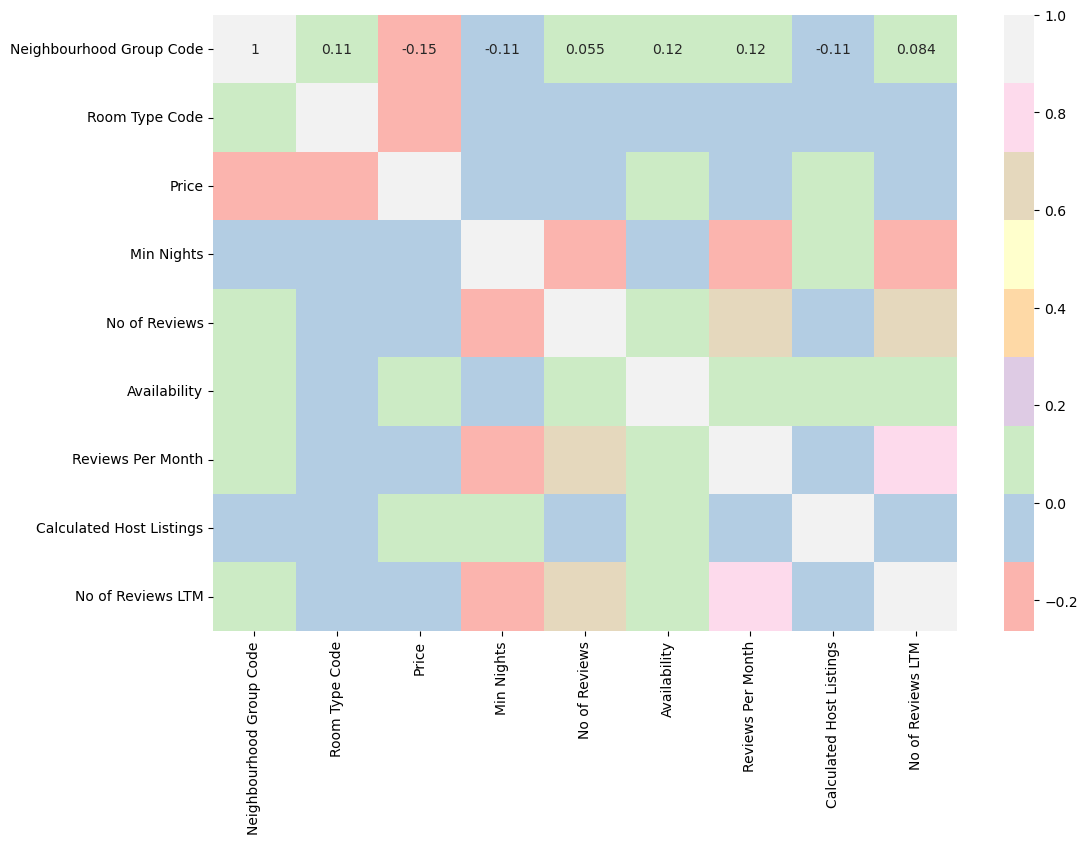

In [86]:
# Creating a correlation heatmap 

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset_df_3.corr(), annot = True, cmap='Pastel1', ax = ax)

#### Interpreting the results of the heatmap

Neighbourhood Group Code and Room Type Code have a weak positive correlation (0.106).

Price has a weak negative correlation with Neighbourhood Group Code (-0.150) and Room Type Code (-0.156), meaning higher prices tend to be associated with certain neighbourhood groups or room types.

Minimum Nights and Calculated Host Listings have a moderate negative correlation (-0.263), meaning that hosts with more listings tend to require shorter minimum nights stays.

No of Reviews and Reviews Per Month have a strong positive correlation (0.611), meaning that listings with more reviews usually have more reviews per month.

Availability and Reviews Per Month have a moderate positive correlation (0.138), meaning listings with higher availability usually receive more reviews per month.

No of Reviews LTM and Reviews Per Month have a very strong positive correlation (0.859), showing a strong relationship between the number of reviews in the last twelve months and the average reviews per month.

### Scatterplots:

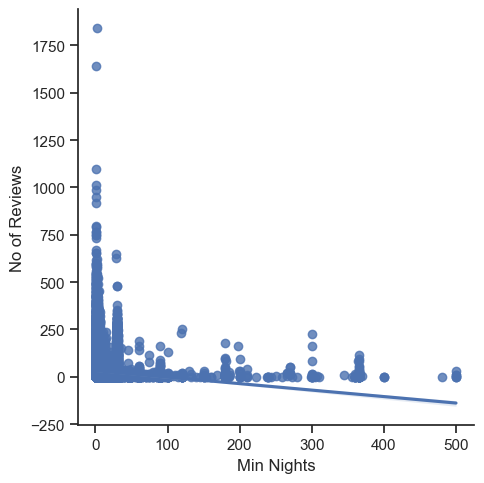

In [104]:
# Create a scatterplot for the "Min Nights " and "Reviews Per Month" columns in seaborn

sns.lmplot(x = 'Min Nights', y = 'No of Reviews', data = subset_df_3)

#### Interpreting the results of the heatmap


### Pair Plots:

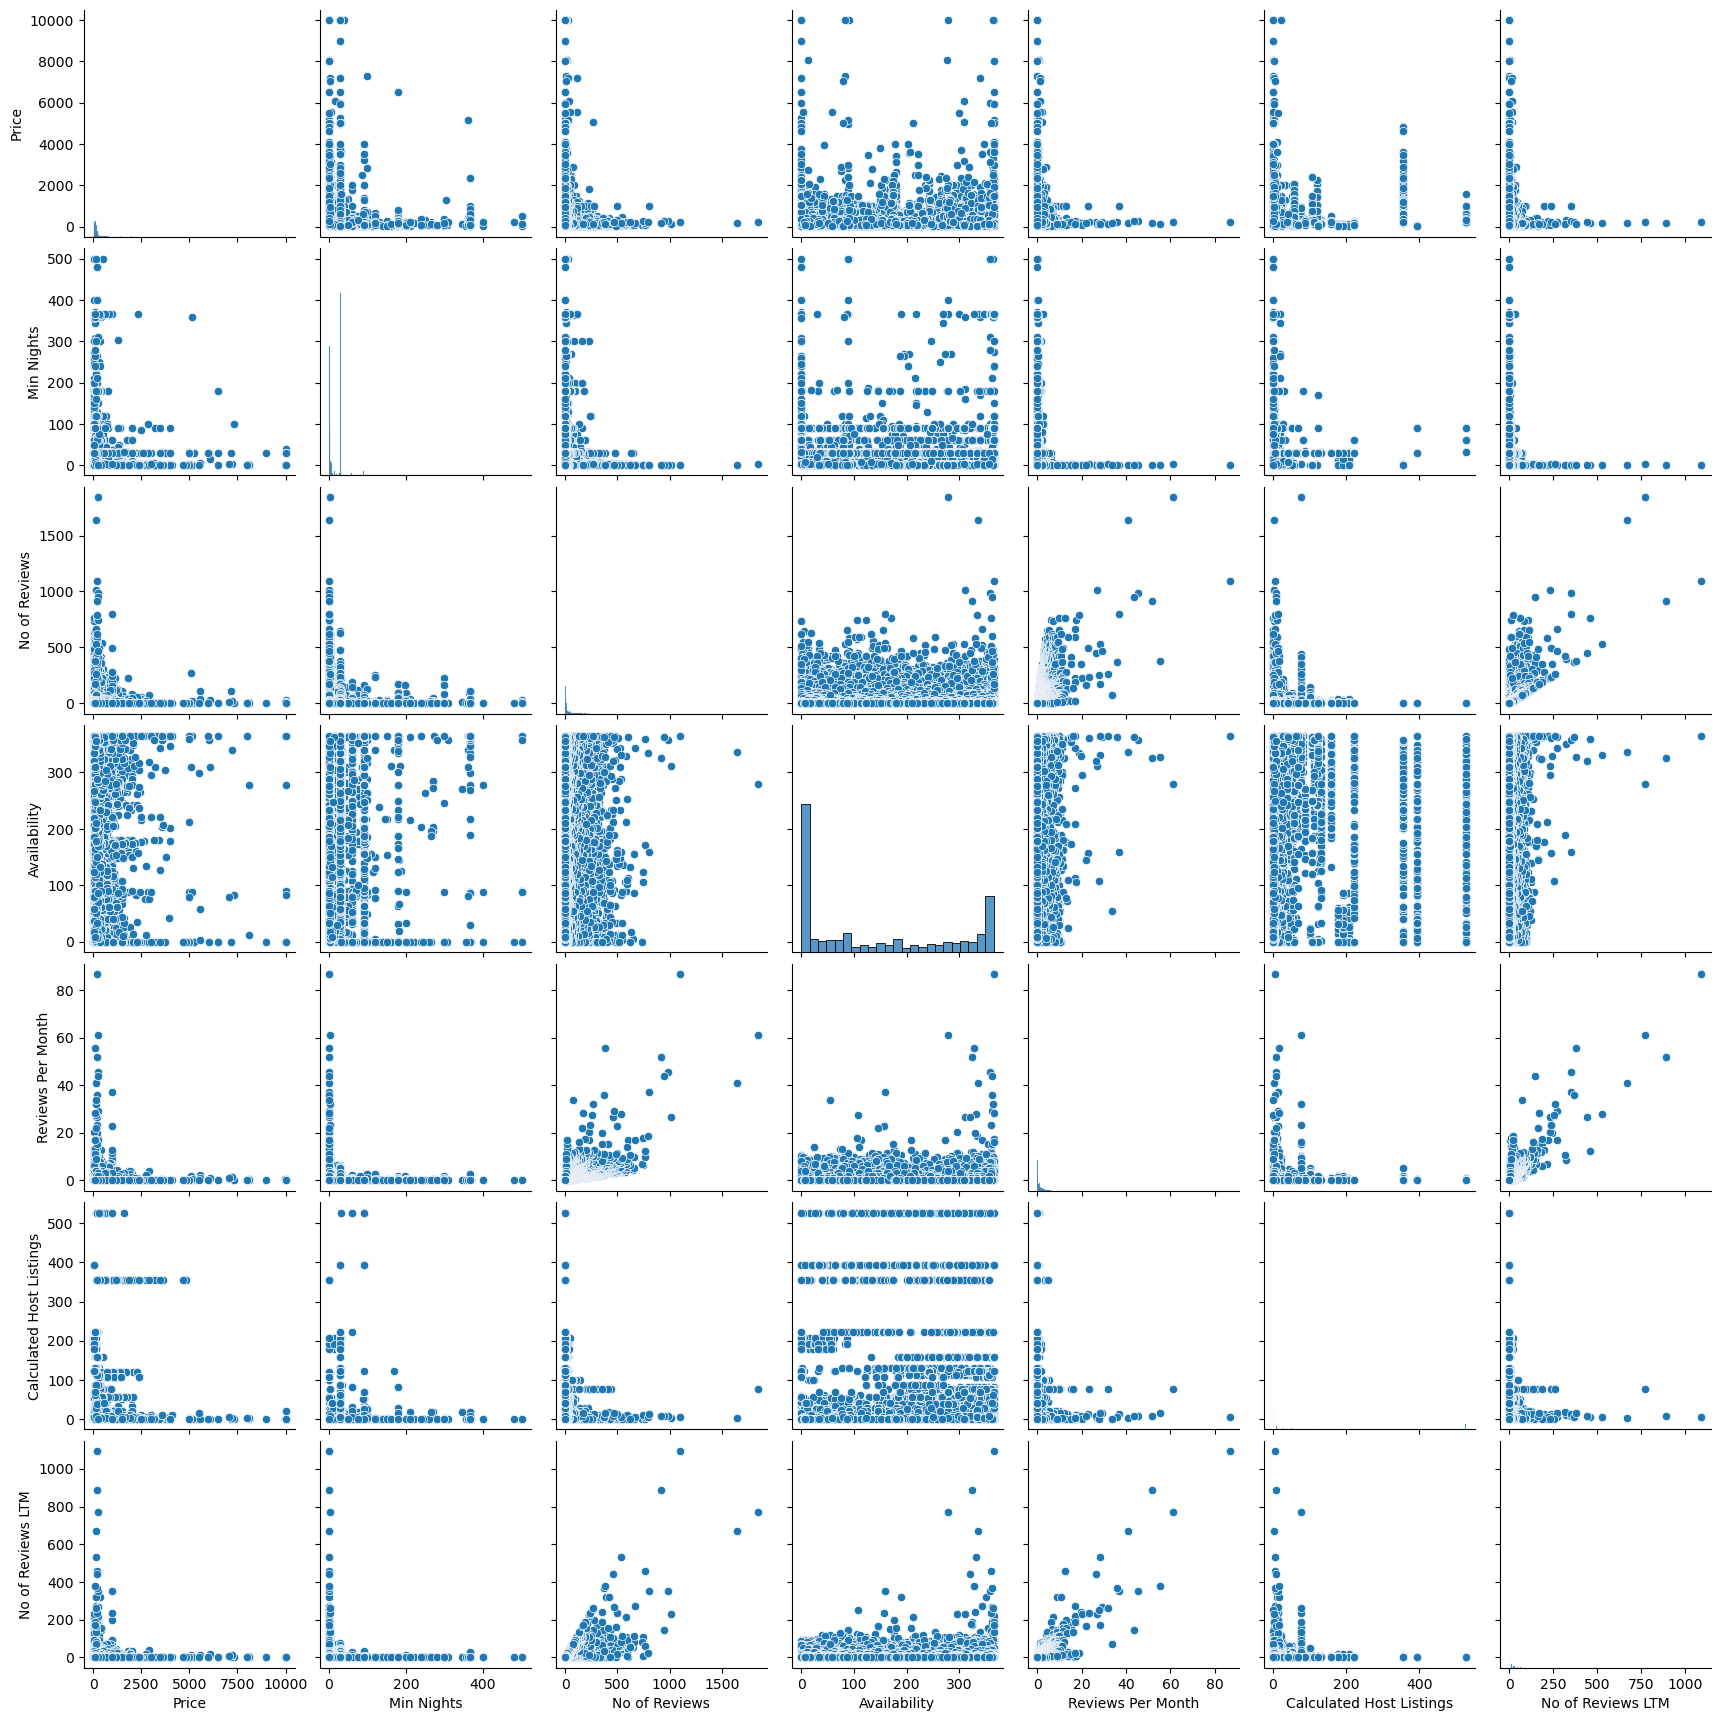

In [90]:
g = sns.pairplot(subset_df_3)

#### Interpreting the results of the heatmap


### Pair Plots:

<Axes: xlabel='Min Nights', ylabel='Count'>

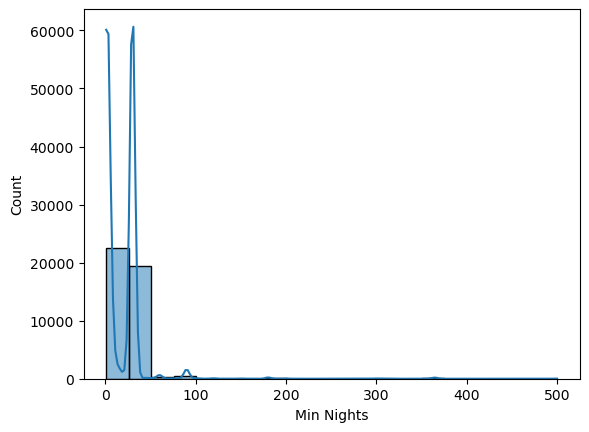

In [93]:
sns.histplot(subset_df_3['Min Nights'], bins = 20, kde = True)

### Categorical Plots

In [99]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x='Price', y='Romm Type Code', hue='Room Type Code', data=subset_df_3)

ValueError: Could not interpret value `Romm Type Code` for parameter `y`